<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Deep_Learning_Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1/20], Loss: 633.5209
Epoch [2/20], Loss: 589.6503
Epoch [3/20], Loss: 582.9443
Epoch [4/20], Loss: 578.3009
Epoch [5/20], Loss: 576.5293
Epoch [6/20], Loss: 573.3218
Epoch [7/20], Loss: 569.2252
Epoch [8/20], Loss: 568.5326
Epoch [9/20], Loss: 565.2154
Epoch [10/20], Loss: 563.2232
Epoch [11/20], Loss: 562.3855
Epoch [12/20], Loss: 562.1916
Epoch [13/20], Loss: 560.7035
Epoch [14/20], Loss: 558.5813
Epoch [15/20], Loss: 559.1755
Epoch [16/20], Loss: 558.6721
Epoch [17/20], Loss: 558.4025
Epoch [18/20], Loss: 557.1357
Epoch [19/20], Loss: 557.6010
Epoch [20/20], Loss: 555.8441


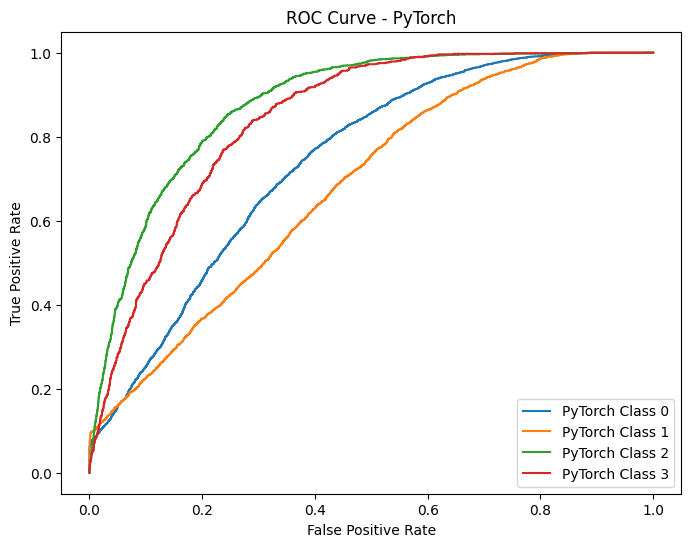

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


611/611 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4440 - loss: 1.2523 - val_accuracy: 0.5595 - val_loss: 0.9908
Epoch 2/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5479 - loss: 1.0092 - val_accuracy: 0.5663 - val_loss: 0.9608
Epoch 3/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5577 - loss: 0.9757 - val_accuracy: 0.5669 - val_loss: 0.9503
Epoch 4/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5596 - loss: 0.9697 - val_accuracy: 0.5674 - val_loss: 0.9453
Epoch 5/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5601 - loss: 0.9561 - val_accuracy: 0.5698 - val_loss: 0.9383
Epoch 6/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5626 - loss: 0.9509 - val_accuracy: 0.5677 - val_loss: 0.9346
Epoch 7/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5629 - loss: 0.9484 - val_accuracy: 0.5703 - val_loss: 0.9344
Epoch 8/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5657 - loss: 0.9441 - val_accuracy: 0.5698 - val_

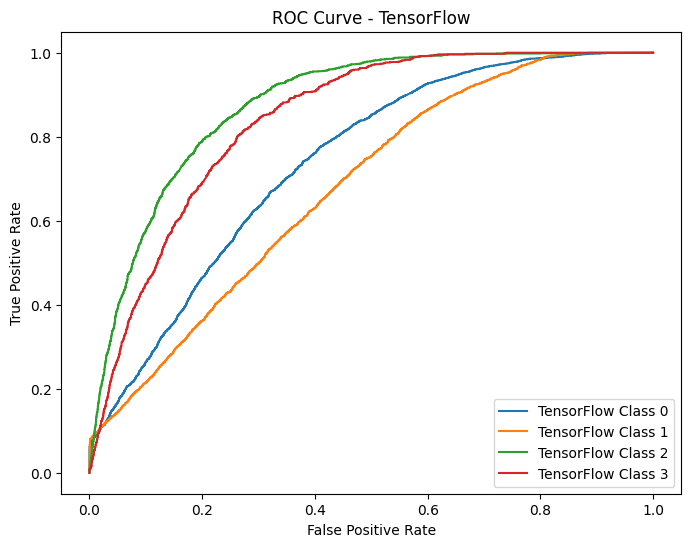


--- Perbandingan Evaluasi Model ---
🔹 Akurasi PyTorch: 0.5990, TensorFlow: 0.5929
🔹 Presisi PyTorch: 0.7097, TensorFlow: 0.7584
🔹 Recall PyTorch: 0.4212, TensorFlow: 0.4066
🔹 F1-Score PyTorch: 0.3772, TensorFlow: 0.3596
🔹 AUC PyTorch: 0.7856, TensorFlow: 0.7844


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load dataset
data_path = '/content/drive/MyDrive/Deep Learning/income.csv'
df = pd.read_csv(data_path)

# Preprocessing
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features.remove("income")
le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])
df_encoded = pd.get_dummies(df, columns=categorical_features)
X = df_encoded.drop(columns=["income"])
y = df_encoded["income"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# PyTorch Model
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

class IncomeNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IncomeNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

input_dim = X_train.shape[1]
output_dim = len(np.unique(y))
model = IncomeNet(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20
batch_size = 64
train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}")

model.eval()
with torch.no_grad():
    y_test_logits = model(X_test_tensor)
    y_test_pred_prob = F.softmax(y_test_logits, dim=1).numpy()
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

y_test_bin = label_binarize(y_test, classes=np.unique(y))
auc_pytorch = roc_auc_score(y_test_bin, y_test_pred_prob, multi_class="ovr")

# Evaluasi Model PyTorch
accuracy_pytorch = accuracy_score(y_test, y_test_pred)
precision_pytorch = precision_score(y_test, y_test_pred, average="macro")
recall_pytorch = recall_score(y_test, y_test_pred, average="macro")
f1_pytorch = f1_score(y_test, y_test_pred, average="macro")

plt.figure(figsize=(8, 6))
for i in range(output_dim):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"PyTorch Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PyTorch")
plt.legend()
plt.show()

# TensorFlow Model
model_tf = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(output_dim, activation='softmax')
])

model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(X_test, y_test))
y_test_pred_prob_tf = model_tf.predict(X_test)
y_test_pred_tf = np.argmax(y_test_pred_prob_tf, axis=1)
auc_tf = roc_auc_score(y_test_bin, y_test_pred_prob_tf, multi_class="ovr")

# Evaluasi Model TensorFlow
accuracy_tf = accuracy_score(y_test, y_test_pred_tf)
precision_tf = precision_score(y_test, y_test_pred_tf, average="macro")
recall_tf = recall_score(y_test, y_test_pred_tf, average="macro")
f1_tf = f1_score(y_test, y_test_pred_tf, average="macro")

plt.figure(figsize=(8, 6))
for i in range(output_dim):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob_tf[:, i])
    plt.plot(fpr, tpr, label=f"TensorFlow Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow")
plt.legend()
plt.show()

# Perbandingan Hasil Evaluasi
print("\n--- Perbandingan Evaluasi Model ---")
print(f"🔹 Akurasi PyTorch: {accuracy_pytorch:.4f}, TensorFlow: {accuracy_tf:.4f}")
print(f"🔹 Presisi PyTorch: {precision_pytorch:.4f}, TensorFlow: {precision_tf:.4f}")
print(f"🔹 Recall PyTorch: {recall_pytorch:.4f}, TensorFlow: {recall_tf:.4f}")
print(f"🔹 F1-Score PyTorch: {f1_pytorch:.4f}, TensorFlow: {f1_tf:.4f}")
print(f"🔹 AUC PyTorch: {auc_pytorch:.4f}, TensorFlow: {auc_tf:.4f}")


##Analisis

Dari hasil perbandingan antara PyTorch dan Tensorflow didapatkan nilai yaitu
- **Nilai Akurasi PyTorch sebesar (59.90%) sedikit lebih tinggi dibandingkan dengan TensorFlow (59.29%)**, hal tersebut menunjukkan bahwa model PyTorch lebih sering memberikan prediksi yang benar secara keseluruhan.
- **Nilai Presisi PyTorch (70.97%) lebih kecil dibandingkan dengan TensorFlow (75.84%)**, hal tersebut menunjukkan model TensorFlow lebih baik dalam menghindari kesalahan positif (False Positives).
- **Nilai Recall PyTorch (42.12%) lebih besar dibandingkan dengan TensorFlow (40.66%)**, hal tersebut menunjukkan model PyTorch lebih baik dalam menangkap sampel positif yang sebenarnya (False Negative lebih sedikit).
- **Nilai F1-Score PyTorch (37.72%) lebih besar dibandingkan dengan TensorFlow (35.96%)**, Model PyTorch memiliki F1-Score yang sedikit lebih tinggi dibandingkan TensorFlow, yang menunjukkan bahwa keseimbangan antara presisi dan recall lebih baik pada model PyTorch.
- **Nilai F1-Score PyTorch (78.56%) sedikit lebih besar dibandingkan dengan TensorFlow (78.44%)**, hal tersebut menunjukkan kemampuan model dalam membedakan kelas positif dan negatif secara keseluruhan cukup seimbang di antara kedua framework ini.

## 📌 Evaluasi Model dengan Metrik Matematis

Berikut adalah rumus-rumus evaluasi yang digunakan untuk mengukur performa model deep learning:

### 1. **Akurasi (Accuracy)**
Akurasi mengukur seberapa sering model membuat prediksi yang benar:
\[
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
\]
Dimana:
- \(TP\) = True Positives (Prediksi positif yang benar)
- \(TN\) = True Negatives (Prediksi negatif yang benar)
- \(FP\) = False Positives (Prediksi positif yang salah)
- \(FN\) = False Negatives (Prediksi negatif yang salah)

---

### 2. **Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif:
\[
$Precision = \frac{TP}{TP + FP}$
\]
Presisi tinggi berarti model jarang memberikan prediksi positif yang salah (FP rendah).

---

### 3. **Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dalam menemukan semua sampel positif yang sebenarnya:
\[
$Recall = \frac{TP}{TP + FN}$
\]
Recall tinggi berarti model jarang melewatkan sampel positif yang sebenarnya (FN rendah).

---

### 4. **F1-Score**
F1-Score adalah rata-rata harmonik antara presisi dan recall, berguna ketika ada ketidakseimbangan kelas:
\[
$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$
\]
F1-Score memberikan keseimbangan antara presisi dan recall.

---

### 5. **AUC (Area Under Curve)**
AUC mengukur luas di bawah kurva ROC. Nilai berkisar antara 0 hingga 1:
\[
$AUC = \int_0^1 TPR(FPR) \, dFPR$
\]
Semakin besar AUC, semakin baik model dalam membedakan kelas positif dan negatif.

---

### 6. **ROC Curve (Receiver Operating Characteristic Curve)**
ROC adalah grafik yang menunjukkan hubungan antara tingkat positif palsu (FPR) dan tingkat positif sejati (TPR):
\[
$TPR = \frac{TP}{TP + FN}$
\]
\[
$FPR = \frac{FP}{FP + TN}$
\]
Kurva ini membantu mengevaluasi keseimbangan antara sensitivitas dan spesifisitas model.

---